# CineMate Recommendation System
## Run the code blocks from top to bottom in order! (Or run the Complete Simplified Version!!!)

# Intalling and Importing Libraries

In [1]:
!pip install colorama
!pip install tk
!pip install scikit-learn
!pip install pandas

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 814.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.0 MB 11.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.6/11.0 MB 9.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/11.0 MB 9.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 5.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 6.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/11.0 MB 7.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.0 MB 7.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/11.0 MB 7.7 MB/s eta 0:00:02
   ------

In [14]:
import pandas as pd
import io
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import colorama
from colorama import Fore, Back, Style
import tkinter as tk

# Uploading Data Sets

## Only run the first one!

In [10]:
# from jupyter
movie_df = pd.read_csv('imdb_top_1000.csv')
netflix_df = pd.read_csv('netflix_titles.csv')
amazon_df = pd.read_csv('amazon_prime_titles.csv')
disney_df = pd.read_csv('disney_plus_titles.csv')
hulu_df = pd.read_csv('hulu_titles.csv')

In [ ]:
# from google colab
from google.colab import files

movie = files.upload()
netflix = files.upload()
amazon = files.upload()
disney = files.upload()
hulu = files.upload()

In [ ]:
# from jupyter (alt/ineffective)

movie_df = pd.read_csv(io.BytesIO(movie['imdb_top_1000.csv']))
netflix_df = pd.read_csv(io.BytesIO(netflix['netflix_titles.csv']))
amazon_df = pd.read_csv(io.BytesIO(amazon['amazon_prime_titles.csv']))
disney_df = pd.read_csv(io.BytesIO(disney['disney_plus_titles.csv']))
hulu_df = pd.read_csv(io.BytesIO(hulu['hulu_titles.csv']))

# Formatting Functions

In [118]:
def center(text):
    length = int(len(text))
    print(int((150-length)/2)*"="+f"{Fore.BLACK + Back.RED+Style.BRIGHT+text}"+f"{Fore.RESET + Back.RESET+int((150-length)//2)*'='}")

# Merging Datasets

In [16]:
# merging all the datasets
# RUN CODE TWICE

# merge all datasets
merged_df = pd.concat([movie_df, netflix_df, amazon_df, disney_df, hulu_df], ignore_index = True)

# merging similar columns
movie_df["type"] = "Movie"
movie_df["title"] = movie_df["Series_Title"]
movie_df["release_year"] = movie_df["Released_Year"]
movie_df["description"] = movie_df["Overview"]
netflix_df["Genre"] = netflix_df["listed_in"]
amazon_df["Genre"] = amazon_df["listed_in"]
disney_df["Genre"] = disney_df["listed_in"]
hulu_df["Genre"] = hulu_df["listed_in"]

merged_df = merged_df.rename(columns = {"type":"Type","title":"Title","release_year":"Release Year","description":"Description"})

# filtering columns from dataset + replace NaN with blank
merged_df = merged_df[["Type","Title","Release Year","Genre","Description"]].fillna("")

# removing movie/show duplicates
merged_df = merged_df.drop_duplicates(subset = ['Title'], keep = 'first')

# resetting index
merged_df.reset_index(drop = True, inplace = True)

merged_df

,Type,Title,Release Year,Genre,Description
0,Movie,The Shawshank Redemption,1994,Drama,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency."
1,Movie,The Godfather,1972,"Crime, Drama",An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
2,Movie,The Dark Knight,2008,"Action, Crime, Drama","When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice."
3,Movie,The Godfather: Part II,1974,"Crime, Drama","The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate."
4,Movie,12 Angry Men,1957,"Crime, Drama",A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.
...,...,...,...,...,...
22808,TV Show,Samurai Harem,2009,"Anime, Comedy, Drama","His skill with a sword is magnificent but his SOCIAL skills need a LOT of work! After many long years perfecting the art of fighting, 17-year-old Yoichi Karasuma is sent down from the remote mountains to begin new training. But what he's really going to learn about are more practical things, like electrical appliances, modern clothing and, most especially, how NOT to make girls to want to kill you. That last lesson is one Yoichi may not survive, as his new dojo is infested with the infernal creatures in the form of the Ikaruga sisters."
22809,TV Show,Scream Queens,2015,"Comedy, Horror, Mystery","SCREAM QUEENS is a new genre-bending comedy-horror anthology series. The series, produced by 20th Century Fox Television, is from Ryan Murphy, Brad Falchuk, Ian Brennan and Dante Di Loreto, the executive producers of GLEE and “American Horror Story.” The first installment in the new anthology series revolves around a college campus which is rocked by a series of murders."
22810,TV Show,Star Trek: The Original Series,1966,"Action, Adventure, Classics","The 23rd century adventures of Captain James T. Kirk and the U.S.S. Enterprise (NCC-1701), a powerful interstellar spacecraft dispatched by Earth-based Starfleet Command to explore the galaxy. Kirk commands a crew of 430 men and women aboard his starship, which can travel at speeds surpassing the speed of light. Kirk's five-year mission – and his mandate from Starfleet – is to seek out new life and new civilizations, and to boldly go where no man has gone before."
22811,TV Show,The Twilight Zone,1959,"Classics, Science Fiction, Thriller","Rod Serling's seminal anthology series focused on ordinary folks who suddenly found themselves in extraordinary, usually supernatural, situations."


# Final Simplified Version

In [197]:
#Simplified Version

center("CineMate Recommendation Services")

username = input('Hi! What is your name? ')
print('\nHi,', username, '! I am CineMate, your personalized companion for discovering the best movies and TV shows tailored to your unique tastes.')
print('Whether you are a movie buff or a casual viewer, CineMate ensures that your next watch is always a match.')
print('')
print('So to get this started: what exactly are you looking for?')
system = input('\nDo you want recommendations based on genre, or do you want recommendations based on a certain movie or TV show? (Genre, Specific) ')

def system_option(x):
    exit = False
    if x.upper() == 'GENRE':
        kind = input('\nGreat! So what are you looking for? Recommendations for a movie, TV show, or both? ')
        genre = input('What genre of movie? (Action, Adventure, Comedy, Drama, Horror, Romance, Science Fiction, Fantasy, Historical, Crime) ')
        number = int(input('\nHow many suggestions do you want? (1 to 10) '))

        if kind.upper() == 'MOVIE':
            mov_df = merged_df.loc[(merged_df["Type"].str.upper() == "MOVIE") & (merged_df["Genre"].str.contains(genre, case = False))]
            suggestions = mov_df.sample(n = number) if not mov_df.empty else pd.DataFrame()
        elif kind.upper() == 'TV SHOW':
            tv_df = merged_df.loc[(merged_df["Type"].str.upper() == "TV SHOW") & (merged_df["Genre"].str.contains(genre, case = False))]
            suggestions = tv_df.sample(n = number) if not tv_df.empty else pd.DataFrame()
        elif kind.upper() == 'BOTH':
            both_df = merged_df.loc[merged_df["Genre"].str.contains(genre, case=False)]
            suggestions = both_df.sample(n = number) if not both_df.empty else pd.DataFrame()

        def recommendations():
            if not suggestions.empty:
                print("\nHere are your recommendations:\n")
                center("RECOMMENDATIONS")
                suggestions.index = pd.RangeIndex(start = 1, stop = number + 1)
                pd.set_option("max_colwidth", None)
                return display(suggestions)
            else:
                print("\nSorry, no suggestions found for your criteria.")

        return recommendations()

    elif x.upper() == 'SPECIFIC':
        print("In order to successfully find a match, you can check first if your title is present within our data!")
        while exit != True:
            title_check = str(input('\nKindly input your title here first to double check: '))
            if len(merged_df[merged_df["Title"].str.contains(title_check)]) != 0:
                center("Database Search Results for "+title_check)
                search_df = pd.DataFrame(merged_df[merged_df["Title"].str.contains(title_check)])
                display(search_df)
                exit_confirmation = input('\nWould you like to input another title? (Y/N)')
                if exit_confirmation.upper() == "Y":
                    exit_confirmation = "Y"
                elif exit_confirmation.upper() == "N":
                    exit_confirmation = "N"
                    exit = True
                    break
            else:
                print("Your search does not appear in our database! Please try another title!")
                exit_confirmation = input('\nWould you like to input another title? (Y/N)')
                if exit_confirmation.upper() == "Y":
                    exit_confirmation = "Y"
                elif exit_confirmation.upper() == "N":
                    exit_confirmation = "N"
                    exit = True
                    break
        
        input_title = str(input('\nGreat! So what is the movie or TV show that you enjoyed and want to find similar of? '))
        number = int(input('\nHow many suggestions do you want? (1 to 10) '))

        dummy_df = merged_df.copy()
        dummy_df["Genre"] = dummy_df["Genre"].str.replace(",", "")

        def combine_features(row):
            return row["Title"] + " " + row["Genre"]

        dummy_df["combined_features"] = dummy_df.apply(combine_features, axis=1)

        cv = CountVectorizer()
        count_matrix = cv.fit_transform(dummy_df["combined_features"])
        cosine_sim = cosine_similarity(count_matrix)

        indices = pd.Series(dummy_df.index, index = dummy_df["Title"]).drop_duplicates()

        def get_recommendations(title, cosine_sim = cosine_sim):
            pd.set_option("max_colwidth", None)

            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:number + 1]
            new_index = [i[0] for i in sim_scores]
            titles_rec = merged_df["Title"].iloc[new_index]

            recs_df = pd.DataFrame(titles_rec)
            recommended_df = recs_df.merge(merged_df, on="Title")
            recommended_df = recommended_df[["Title", "Type", "Release Year", "Genre", "Description"]]
            recommended_df.index = pd.RangeIndex(start=1, stop=len(recommended_df) + 1)
            center("RECOMMENDATIONS")
            return display(recommended_df)

        return get_recommendations(input_title)

system_option(system)
center("Thank you for using CineMate, we hope to see you again!")

===========================================================CineMate Recommendation Services===========================================================


Hi! What is your name?  FAFA



Hi, FAFA ! I am CineMate, your personalized companion for discovering the best movies and TV shows tailored to your unique tastes.
Whether you are a movie buff or a casual viewer, CineMate ensures that your next watch is always a match.

So to get this started: what exactly are you looking for?



Do you want recommendations based on genre, or do you want recommendations based on a certain movie or TV show? (Genre, Specific)  SPECIFIC


In order to successfully find a match, you can check first if your title is present within our data!



Kindly input your title here first to double check:  Stranger Things


=====================================================Database Search Results for Stranger Things=====================================================


,Type,Title,Release Year,Genre,Description
4618,TV Show,Stranger Things,2019,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","When a young boy vanishes, a small town uncovers a mystery involving secret experiments, terrifying supernatural forces and one strange little girl."
6115,TV Show,Beyond Stranger Things,2017,"Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy","Secrets from the ""Stranger Things 2"" universe are revealed as cast and guests discuss the latest episodes with host Jim Rash. Caution: spoilers ahead!"



Would you like to input another title? (Y/N) y

Kindly input your title here first to double check:  dadwa


Your search does not appear in our database! Please try another title!



Would you like to input another title? (Y/N) y

Kindly input your title here first to double check:  ada


===========================================================Database Search Results for ada===========================================================


,Type,Title,Release Year,Genre,Description
442,Movie,La Strada,1954,Drama,"A care-free girl is sold to a traveling entertainer, consequently enduring physical and emotional pain along the way."
536,Movie,La montaña sagrada,1973,"Adventure, Drama, Fantasy","In a corrupt, greed-fueled world, a powerful alchemist leads a messianic character and seven materialistic figures to the Holy Mountain, where they hope to achieve enlightenment."
1412,Movie,Chhota Bheem: The Rise of Kirmada,2012,Children & Family Movies,Bheem and young lord Krishna team up to protect the world against the wicked and powerful Kirmada and his equally dangerous bat army.
1816,Movie,Soy Rada: Serendipity,2021,Stand-Up Comedy,"The delightful Argentine comic Agustín Aristarán (aka Soy Rada) is back, this time putting the spotlight on family and parenting, magic and music."
1912,Movie,Madagascar 3: Europe's Most Wanted,2012,"Children & Family Movies, Comedies","Next stop: New York! But to get back home, Alex and friends must hitch a ride with a traveling European circus and evade an evil animal-control officer."
...,...,...,...,...,...
20612,Movie,Dark Web: Cicada 3301,2021,"Action, Adventure, Comedy","When hacker Connor and his friends discover a mysterious online treasure hunt, the trio must elude aggressive NSA agents as they race to find the clues and claim the prize."
21261,TV Show,Giada's Holiday Handbook,2015,"Cooking & Food, Lifestyle & Culture",Giada de Laurentis shares her tips and tricks to pulling off a holiday season parties.
21309,Movie,Madagascar: A Little Wild - A Fang-Tastic Halloween,2020,"Cartoons, Family, Kids","After hearing spooky rumors about the new habitat resident- A BAT- Marty is determined to protect his friends from the newcomer. But when the bat helps him out of a tough situation, Marty learns it’s better to get to know someone before judging them."
22148,TV Show,Nostradamus Effect,2009,"Documentaries, Drama, History","How do real-life happenings correlate with a particular prophecy? That's the question posed in this series, and the answers come from experts who deconstruct the prophecies of Nostradamus as well as ones from the Bible, mythology, hieroglyphs and other ancient texts to identify links between age-old predictions and events of today."



Would you like to input another title? (Y/N) n


KeyboardInterrupt: Interrupted by user

# Complete Simplified Version

In [13]:
#Importing libraries
import pandas as pd
import io
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import colorama
from colorama import Fore, Back, Style
import tkinter as tk

#Importing files from jupyter application
movie_df = pd.read_csv('imdb_top_1000.csv')
netflix_df = pd.read_csv('netflix_titles.csv')
amazon_df = pd.read_csv('amazon_prime_titles.csv')
disney_df = pd.read_csv('disney_plus_titles.csv')
hulu_df = pd.read_csv('hulu_titles.csv')

#Formatting Functions
def center(text):
    length = int(len(text))
    print(int((150-length)/2)*"="+f"{Fore.BLACK + Back.YELLOW+Style.BRIGHT+text}"+f"{Fore.RESET + Back.RESET+int((150-length)//2)*'='}")

#Merging Datasets
merge_repeat = 0
while merge_repeat != 2:
# merge all datasets
    merged_df = pd.concat([movie_df, netflix_df, amazon_df, disney_df, hulu_df], ignore_index = True)

# merging similar columns
    movie_df["type"] = "Movie"
    movie_df["title"] = movie_df["Series_Title"]
    movie_df["release_year"] = movie_df["Released_Year"]
    movie_df["description"] = movie_df["Overview"]
    netflix_df["Genre"] = netflix_df["listed_in"]
    amazon_df["Genre"] = amazon_df["listed_in"]
    disney_df["Genre"] = disney_df["listed_in"]
    hulu_df["Genre"] = hulu_df["listed_in"]

    merged_df = merged_df.rename(columns = {"type":"Type","title":"Title","release_year":"Release Year","description":"Description"})

# filtering columns from dataset + replace NaN with blank
    merged_df = merged_df[["Type","Title","Release Year","Genre","Description"]].fillna("")

# removing movie/show duplicates
    merged_df = merged_df.drop_duplicates(subset = ['Title'], keep = 'first')

# resetting index
    merged_df.reset_index(drop = True, inplace = True)
    merged_df
    merge_repeat+=1

#Simplified Version

center("CineMate Recommendation Services")

username = input('Hi! What is your name? ')
print('\nHi,', username, '! I am CineMate, your personalized companion for discovering the best movies and TV shows tailored to your unique tastes.')
print('Whether you are a movie buff or a casual viewer, CineMate ensures that your next watch is always a match.')
print('')
print('So to get this started: what exactly are you looking for?')
system = input('\nDo you want recommendations based on genre, or do you want recommendations based on a certain movie or TV show? (Genre, Specific) ')

def system_option(x):
    exit = False
    if x.upper() == 'GENRE':
        kind = input('\nGreat! So what are you looking for? Recommendations for a movie, TV show, or both? ')
        genre = input('What genre of movie? (Action, Adventure, Comedy, Drama, Horror, Romance, Science Fiction, Fantasy, Historical, Crime) ')
        number = int(input('\nHow many suggestions do you want? (1 to 10) '))

        if kind.upper() == 'MOVIE':
            mov_df = merged_df.loc[(merged_df["Type"].str.upper() == "MOVIE") & (merged_df["Genre"].str.contains(genre, case = False))]
            suggestions = mov_df.sample(n = number) if not mov_df.empty else pd.DataFrame()
        elif kind.upper() == 'TV SHOW':
            tv_df = merged_df.loc[(merged_df["Type"].str.upper() == "TV SHOW") & (merged_df["Genre"].str.contains(genre, case = False))]
            suggestions = tv_df.sample(n = number) if not tv_df.empty else pd.DataFrame()
        elif kind.upper() == 'BOTH':
            both_df = merged_df.loc[merged_df["Genre"].str.contains(genre, case=False)]
            suggestions = both_df.sample(n = number) if not both_df.empty else pd.DataFrame()

        def recommendations():
            if not suggestions.empty:
                print("\nHere are your recommendations:\n")
                center("RECOMMENDATIONS")
                suggestions.index = pd.RangeIndex(start = 1, stop = number + 1)
                pd.set_option("max_colwidth", None)
                return display(suggestions)
            else:
                print("\nSorry, no suggestions found for your criteria.")

        return recommendations()

    elif x.upper() == 'SPECIFIC':
        print("In order to successfully find a match, you can check first if your title is present within our data!")
        while exit != True:
            title_check = str(input('\nKindly input your title here first to double check: ')).lower()
            if len(merged_df[merged_df["Title"].str.lower().str.contains(title_check, case=False)]) != 0:
                center("Database Search Results for "+title_check)
                search_df = pd.DataFrame(merged_df[merged_df["Title"].str.lower().str.contains(title_check, case=False)])
                display(search_df)
                exit_confirmation = input('\nWould you like to input another title? (Y/N)')
                if exit_confirmation.upper() == "Y":
                    exit_confirmation = "Y"
                elif exit_confirmation.upper() == "N":
                    exit_confirmation = "N"
                    exit = True
                    break
            else:
                print("Your search does not appear in our database! Please try another title!")
                exit_confirmation = input('\nWould you like to input another title? (Y/N)')
                if exit_confirmation.upper() == "Y":
                    exit_confirmation = "Y"
                elif exit_confirmation.upper() == "N":
                    exit_confirmation = "N"
                    exit = True
                    break
        
        input_title = str(input('\nGreat! So what is the movie or TV show that you enjoyed and want to find similar of? ')).lower()
        number = int(input('\nHow many suggestions do you want? (1 to 10) '))

        dummy_df = merged_df.copy()
        dummy_df["Genre"] = dummy_df["Genre"].str.replace(",", "")

        def combine_features(row):
            return row["Title"] + " " + row["Genre"]

        dummy_df["combined_features"] = dummy_df.apply(combine_features, axis=1)

        cv = CountVectorizer()
        count_matrix = cv.fit_transform(dummy_df["combined_features"])
        cosine_sim = cosine_similarity(count_matrix)

        indices = pd.Series(dummy_df.index, index = dummy_df["Title"].str.lower()).drop_duplicates()

        def get_recommendations(title, cosine_sim = cosine_sim):
            pd.set_option("max_colwidth", None)

            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:number + 1]
            new_index = [i[0] for i in sim_scores]
            titles_rec = merged_df["Title"].iloc[new_index]

            recs_df = pd.DataFrame(titles_rec)
            recommended_df = recs_df.merge(merged_df, on="Title")
            recommended_df = recommended_df[["Title", "Type", "Release Year", "Genre", "Description"]]
            recommended_df.index = pd.RangeIndex(start=1, stop=len(recommended_df) + 1)
            center("RECOMMENDATIONS")
            return display(recommended_df)
        

        return get_recommendations(input_title)

system_option(system)
center("Thank you for using CineMate, we hope to see you again!")

===========================================================CineMate Recommendation Services===========================================================


KeyboardInterrupt: Interrupted by user

# Recommendation System ver. 1 (Using Genres)

In [ ]:
name = str(input('Hi! What is your name? '))
print('\nHi,', name, '! I am CineMate, your personalized companion for discovering the best movies and TV shows tailored to your unique tastes.')
print('Whether you are a movie buff or a casual viewer, CineMate ensures that your next watch is always a match.')

kind = str(input('\nSo to get this started: what are you looking for? Recommendations for a movie, TV show, or both? '))
genre = str(input('What genre of movie? (Action, Adventure, Comedy, Drama, Horror, Romance, Science Fiction, Fantasy, Historical, Crime) '))
number = int(input('\nHow many suggestions do you want? (1 to 10) '))

if kind.upper() == 'MOVIE':
    mov_df = merged_df.loc[(merged_df["Type"].str.upper() == "MOVIE") & (merged_df["Genre"].str.contains(genre, case=False))]
    suggestions = mov_df.sample(n=number) if not mov_df.empty else pd.DataFrame()
elif kind.upper() == 'TV SHOW':
    tv_df = merged_df.loc[(merged_df["Type"].str.upper() == "TV SHOW") & (merged_df["Genre"].str.contains(genre, case=False))]
    suggestions = tv_df.sample(n=number) if not tv_df.empty else pd.DataFrame()
elif kind.upper() == 'BOTH':
    both_df = merged_df.loc[merged_df["Genre"].str.contains(genre, case=False)]
    suggestions = both_df.sample(n=number) if not both_df.empty else pd.DataFrame()

def recommendations():
  if not suggestions.empty:
    print("\nHere are your recommendations:\n")
    suggestions.index = pd.RangeIndex(start = 1, stop = number + 1)
    pd.set_option("max_colwidth", None)
    return suggestions

  else:
    print("\nSorry, no suggestions found for your criteria.")

recommendations()

In [ ]:
# less chunky ver.

name = str(input('Hi! What is your name? '))
print('\nHi,', name, '! I am CineMate, your personalized companion for discovering the best movies and TV shows tailored to your unique tastes.')
print('Whether you are a movie buff or a casual viewer, CineMate ensures that your next watch is always a match.')

kind = str(input('\nSo to get this started: what are you looking for? Recommendations for a movie, TV show, or both? '))
genre = str(input('What genre of movie? (Action, Adventure, Comedy, Drama, Horror, Romance, Science Fiction, Fantasy, Historical, Crime) '))
number = int(input('\nHow many suggestions do you want? (1 to 10) '))

mov_df = merged_df.loc[(merged_df["Type"].str.upper() == "MOVIE") & (merged_df["Genre"].str.contains(genre, case = False))]
tv_df = merged_df.loc[(merged_df["Type"].str.upper() == "TV SHOW") & (merged_df["Genre"].str.contains(genre, case = False))]
both_df = merged_df.loc[merged_df["Genre"].str.contains(genre, case = False)]

suggestions = mov_df.sample(n=number) if kind.upper() == 'MOVIE' else (tv_df.sample(n = number) if kind.upper() == 'TV SHOW' else both_df.sample(n = number))

def recommendations():
  if not suggestions.empty:
    print("\nHere are your recommendations:\n")
    suggestions.index = pd.RangeIndex(start = 1, stop = number + 1)
    pd.set_option("max_colwidth", None)
    return suggestions

  else:
    print("\nSorry, no suggestions found for your criteria.")

recommendations()

# Recommendation System ver. 2 (Using Machine Learning)

In [ ]:
# machine learning
# note: title must be spelled the same as in the dataset
# no choosing if movie, tv show, or both (only using merged_df)

name = str(input('Hi! What is your name? '))
print('\nHi,', name, '! I am CineMate, your personalized companion for discovering the best movies and TV shows tailored to your unique tastes.')
print('Whether you are a movie buff or a casual viewer, CineMate ensures that your next watch is always a match.')

number = int(input('\nHow many suggestions do you want? (1 to 10) '))

# machine learning part 1 (getting columns to feed the system in finding similarity)
dummy_df = merged_df.copy()
dummy_df["Genre"] = dummy_df.loc[:,"Genre"].str.replace(",","")

def combine_features(row):
  return row["Title"] + " " + row["Genre"]

dummy_df["combined_features"] = dummy_df.apply(combine_features, axis = 1)

cv = CountVectorizer()
count_matrix = cv.fit_transform(dummy_df["combined_features"])
cosine_sim = cosine_similarity(count_matrix)


# machine learning part 2 (getting similar movies/shows)
indices = pd.Series(dummy_df.index, index = dummy_df["Title"])

def get_recommendations(title, cosine_sim = cosine_sim):
  pd.set_option("max_colwidth", None)

  # finding and listing similar movies/shows
  sim_scores = list(enumerate(cosine_sim[indices[title]]))
  sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
  sim_scores = sim_scores[1:number + 1] # starts from index 1 bcs an inputted movie will always be the most similar to itself
  new_index = [i[0] for i in sim_scores]
  titles_rec = merged_df["Title"].loc[new_index]

  # table for recommended movies/shows
  recs_df = pd.DataFrame(titles_rec)
  recommended_df = recs_df.merge(merged_df, on = "Title")
  recommended_df = recommended_df[["Title","Type","Release Year","Genre","Description"]]
  # recommended_df["Genre"] = recommended_df.loc[:,"Genre"].str.replace(" ",", ")
  recommended_df.reset_index(drop = True)
  recommended_df.index = pd.RangeIndex(start = 1, stop = number + 1)
  return recommended_df

# Data Visualization

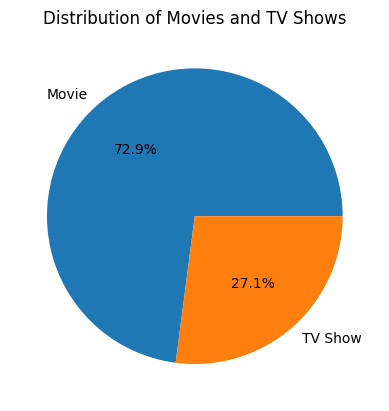

In [20]:
import matplotlib.pyplot as plt

# pie chart for movie/tv show dataset distribution

plt.pie(merged_df["Type"].value_counts().values, labels = ["Movie","TV Show"], autopct = "%1.1f%%")
plt.title('Distribution of Movies and TV Shows')
plt.show()


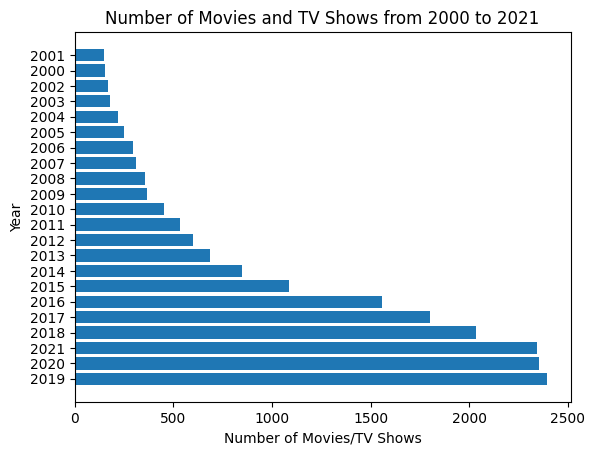

In [19]:
# bar graph for release years

yr_list = []

for i in list(merged_df["Release Year"].value_counts().index):
    yr_list.append(str(i))

yr_list = list(dict.fromkeys(yr_list))

yr_count = merged_df["Release Year"].value_counts().values[0:22]
yrs = yr_list[0:22]

plt.barh(yrs, yr_count)
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Year')
plt.title('Number of Movies and TV Shows from 2000 to 2021')
plt.show()